## CUSTOMER ANALYSIS FOR RETAIL CASE STUDY 

### Importing important libraries

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings 
warnings.filterwarnings('ignore')

In [44]:
os.chdir('C:\\Users\\ASUS\\OneDrive\\Desktop\\python case studies\\Data Analysis Projects\\Case Study 1 - Retail Case Study')

### Uploading Data

In [47]:
customer = pd.read_csv('Customer.csv')
prod_cat_info = pd.read_csv('prod_cat_info.csv')
transactions = pd.read_csv('Transactions.csv')

### Data Preparation and Analysis

1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [50]:
customer.rename(columns={'customer_Id':'cust_id'},inplace=True)
merged_df = pd.merge(transactions,customer,on='cust_id',how='left')

In [52]:
prod_cat_info.rename(columns={'prod_sub_cat_code':'prod_subcat_code'},inplace=True)
customer_final = pd.merge(merged_df,prod_cat_info,on=['prod_cat_code','prod_subcat_code'],how='left')

In [53]:
customer_final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,Computers


2. Prepare a summary report for the merged data set.

a. Get the column names and their corresponding data types

In [59]:
customer_final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
DOB                  object
Gender               object
city_code           float64
prod_cat             object
prod_subcat          object
dtype: object

In [61]:
for x in ['tran_date','DOB']:
    customer_final[x] = pd.to_datetime(customer_final[x],errors='coerce')

In [63]:
customer_final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
prod_cat                    object
prod_subcat                 object
dtype: object

b. Top/Bottom 10 observations

In [66]:
customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,1973-05-11,F,8.0,Electronics,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,1981-06-08,M,3.0,Home and kitchen,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,1982-10-09,F,6.0,Electronics,Personal Appliances
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,1981-05-29,M,9.0,Home and kitchen,Bath
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,1971-04-21,M,9.0,Home and kitchen,Tools
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,1971-11-04,F,8.0,Clothing,Kids
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,1979-11-27,F,3.0,Electronics,Personal Appliances


In [67]:
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,1976-08-10,M,8.0,Books,Non-Fiction
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,1991-10-12,M,4.0,Electronics,Mobiles
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,1980-01-17,F,8.0,Books,DIY
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,1975-06-28,F,6.0,Home and kitchen,Bath
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,1974-04-18,M,4.0,Footwear,Kids
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,1972-02-21,M,7.0,Books,Academic
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,1984-04-27,M,9.0,Clothing,Mens
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,1976-06-20,M,8.0,Home and kitchen,Furnishing
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,1970-05-22,M,2.0,Books,Children
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,1982-01-15,M,1.0,Books,Children


c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [70]:
cont_var = customer_final.select_dtypes('number')
cat_var = customer_final.select_dtypes('object')

In [72]:
cont_var.describe().loc['min':'max'].T

,min,25%,50%,75%,max
transaction_id,3268991.000,2.493864e+10,5.009313e+10,7.533000e+10,9.998755e+10
cust_id,266783.000,2.689350e+05,2.709800e+05,2.731140e+05,2.752650e+05
prod_subcat_code,1.000,3.000000e+00,5.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code,1.000,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Qty,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,-1499.000,3.120000e+02,7.100000e+02,1.109000e+03,1.500000e+03
Tax,7.350,9.828000e+01,1.990800e+02,3.657150e+02,7.875000e+02
total_amt,-8270.925,7.624500e+02,1.754740e+03,3.569150e+03,8.287500e+03
city_code,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01


d. Frequency tables for all the categorical variables

In [76]:
for i in cat_var:
    print(customer_final[i].value_counts())

Store_type
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: count, dtype: int64
Gender
M    11811
F    11233
Name: count, dtype: int64
prod_cat
Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: count, dtype: int64
prod_subcat
Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Mobiles                1031
Comics                 1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: count, dtype: int64


3. Generate histograms for all continuous variables and frequency bars for categorical variables.

transaction_id


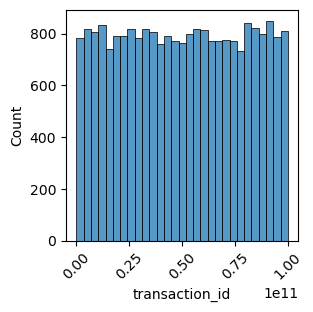

cust_id


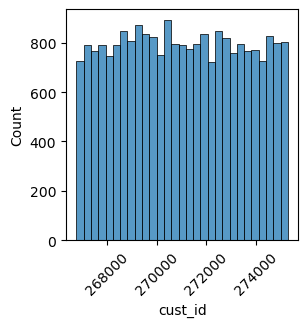

prod_subcat_code


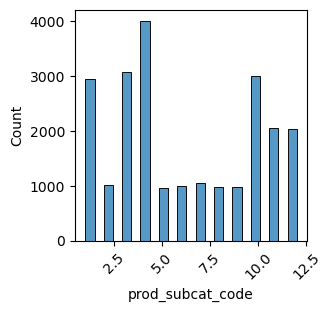

prod_cat_code


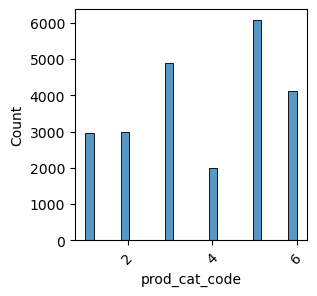

Qty


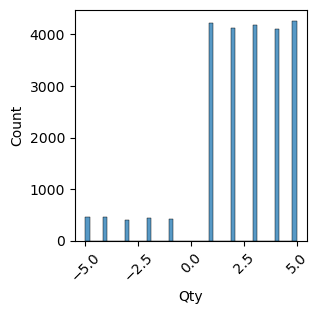

Rate


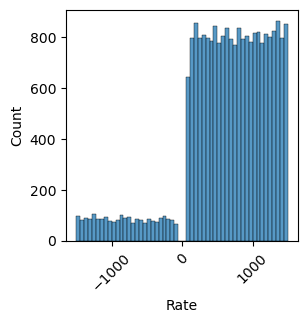

Tax


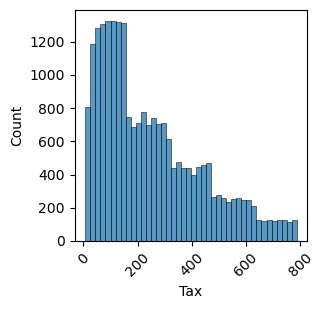

total_amt


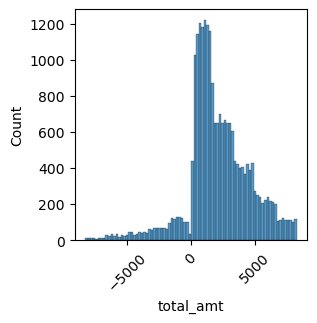

city_code


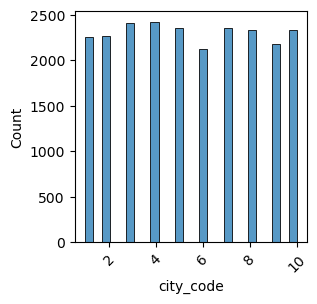

In [79]:
for i in cont_var.columns:
    print(i)
    plt.figure(figsize=(3,3))
    sns.histplot(customer_final[i])
    plt.xticks(rotation=45)
    plt.show()

Store_type


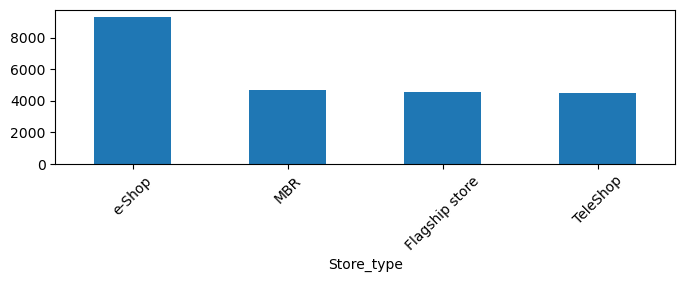

Gender


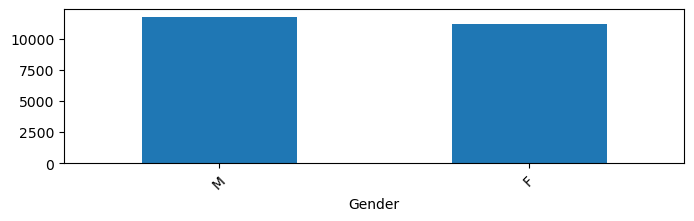

prod_cat


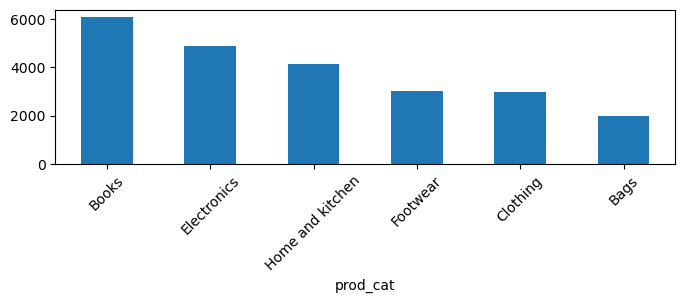

prod_subcat


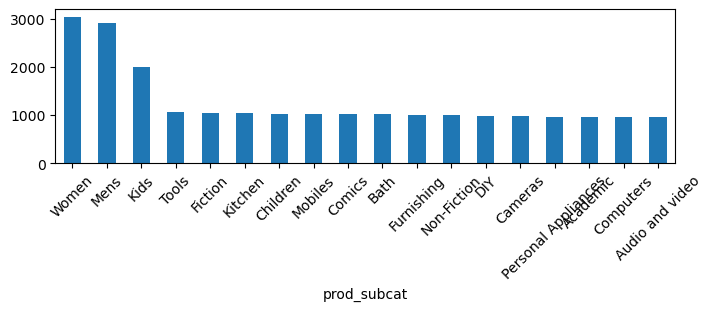

In [80]:
for i in cat_var.columns:
    print(i)
    plt.figure(figsize=(8,2))
    customer_final[i].value_counts().plot(kind='bar')
    plt.xticks(rotation=45)
    plt.show()

4. Calculate the following information using the merged dataset :

a. Time period of the available transaction data


In [83]:
customer_final['tran_date'].max() - customer_final['tran_date'].min()

Timedelta('1130 days 00:00:00')

b. Count of transactions where the total amount of transaction was negative

In [85]:
customer_final[customer_final['total_amt']<0].transaction_id.count()

2177

5. Analyze which product categories are more popular among females vs male customers.

In [87]:
filtered_data = customer_final.groupby(['Gender','prod_cat']).Qty.count().reset_index()
female_prod = filtered_data[filtered_data['Gender']=='F'].sort_values(by='Qty',ascending=False).iloc[0].prod_cat
male_prod = filtered_data[filtered_data['Gender']=='M'].sort_values(by='Qty',ascending=False).iloc[0].prod_cat
print('The product category popular among males is',male_prod,'and among females is',female_prod)

The product category popular among males is Books and among females is Books


6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [109]:
max_cust_city_code = customer_final.groupby('city_code').cust_id.count().sort_values(ascending=False)\
.index[0]
percentage = round((customer_final.groupby('city_code').cust_id.count().sort_values(ascending=False)\
.iloc[0]/customer_final['cust_id'].nunique())*100,2)
print(max_cust_city_code,'has the maximum customers and the percentage of customers from this city is',percentage,'%')

4.0 has the maximum customers and the percentage of customers from this city is 43.99 %


7. Which store type sells the maximum products by value and by quantity?


In [91]:
store_max_value = customer_final.groupby('Store_type').total_amt.sum().sort_values(ascending=False).index[0]
store_max_qty = customer_final.groupby('Store_type').Qty.sum().sort_values(ascending=False).index[0]
print(store_max_value,'sells the maximum products by value and',store_max_qty,'seels the maximum products by quantity')

e-Shop sells the maximum products by value and e-Shop seels the maximum products by quantity


8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [111]:
amount = customer_final[(customer_final['Store_type']=='Flagship store')&(customer_final['prod_cat']\
.isin(['Electronics','Clothing']))].total_amt.sum()
print('The total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores is',amount)

The total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores is 3409559.27


9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [114]:
amount = round(customer_final[(customer_final['Gender']=='M')&(customer_final['prod_cat']=='Electronics')].total_amt.sum(),2)
print(amount,'is the total amount earned from "Male" customers under the "Electronics" category')

5703109.42 is the total amount earned from "Male" customers under the "Electronics" category


10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [117]:
filtered_data = customer_final[customer_final['total_amt']>0].groupby('cust_id').transaction_id.nunique()
customers = filtered_data[filtered_data>10].count()
print(customers,'customers have more than 10 unique transactions, after removing all transactions which have any negative amounts')

6 customers have more than 10 unique transactions, after removing all transactions which have any negative amounts


11. For all customers aged between 25 - 35, find out:

In [120]:
from datetime import datetime

In [122]:
customer_final['age'] = customer_final.DOB.apply(lambda x: datetime.now().year - x.year)

In [124]:
filtered_data = customer_final[customer_final['age'].between(25,35)]

a. What was the total amount spent for “Electronics” and “Books” product categories?

In [127]:
amount = customer_final[customer_final['prod_cat'].isin(['Electronics','Books'])].total_amt.sum()
print(amount,'is the total amount spent for “Electronics” and “Books” product categories')

23545157.675 is the total amount spent for “Electronics” and “Books” product categories


b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [130]:
amount = customer_final[customer_final['tran_date'].between('2014-01-01','2014-03-01')].total_amt.sum()
print(amount,'was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014')

1202619.0150000001 was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014
